In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.optimize import minimize

from sklearn.preprocessing import PolynomialFeatures

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [2]:
def loaddata(file, delimeter):
    data = np.loadtxt(file, delimiter=delimeter)
    print('Dimensions: ',data.shape)
    print(data[1:6,:])
    return(data)

In [3]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

In [4]:
# The code was removed by Watson Studio for sharing.

In [5]:
data
#data.info

array([[ 34.62365962,  78.02469282,   0.        ],
       [ 30.28671077,  43.89499752,   0.        ],
       [ 35.84740877,  72.90219803,   0.        ],
       [ 60.18259939,  86.3085521 ,   1.        ],
       [ 79.03273605,  75.34437644,   1.        ],
       [ 45.08327748,  56.31637178,   0.        ],
       [ 61.10666454,  96.51142588,   1.        ],
       [ 75.02474557,  46.55401354,   1.        ],
       [ 76.0987867 ,  87.42056972,   1.        ],
       [ 84.43281996,  43.53339331,   1.        ],
       [ 95.86155507,  38.22527806,   0.        ],
       [ 75.01365839,  30.60326323,   0.        ],
       [ 82.30705337,  76.4819633 ,   1.        ],
       [ 69.36458876,  97.71869196,   1.        ],
       [ 39.53833914,  76.03681085,   0.        ],
       [ 53.97105215,  89.20735014,   1.        ],
       [ 69.07014406,  52.74046973,   1.        ],
       [ 67.94685548,  46.67857411,   0.        ],
       [ 70.66150955,  92.92713789,   1.        ],
       [ 76.97878373,  47.57596

In [7]:
#X = np.c_[np.ones((data.shape[0],1)), data[:,0:2]]
X = data[:,0:2]
y = data[:,2]
print(X[0])
print(y)

[ 34.62365962  78.02469282]
[ 0.  0.  0.  1.  1.  0.  1.  1.  1.  1.  0.  0.  1.  1.  0.  1.  1.  0.
  1.  1.  0.  1.  0.  0.  1.  1.  1.  0.  0.  0.  1.  1.  0.  1.  0.  0.
  0.  1.  0.  0.  1.  0.  1.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  0.
  0.  0.  1.  0.  1.  1.  1.  0.  0.  0.  0.  0.  1.  0.  1.  1.  0.  1.
  1.  1.  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.  0.  1.  1.  0.
  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.]


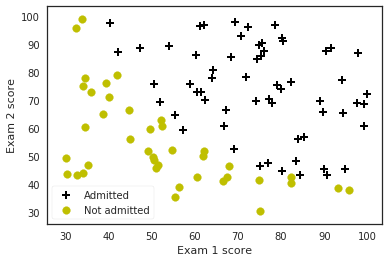

In [8]:
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')

In [9]:
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

In [10]:
def costFunction(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
               
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

In [11]:
def gradient(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1,1)))
    
    grad =(1/m)*X.T.dot(h-y)

    return(grad.flatten())

In [12]:
initial_theta = np.zeros(X.shape[1])
cost = costFunction(initial_theta, X, y)
grad = gradient(initial_theta, X, y)
print('Cost: \n', cost)
print('Grad: \n', grad)

IndexError: invalid index to scalar variable.